###    Automobile Exploratory Data Anaylsis


We will begin our analysis by exploring the univariant and bivariate characteristics of this dataset. The goal of this EDA is to understand how different car and there parts are related to each other and begin to consider which key featuers we would like to pursue first in our analysis of the data. Towards the end of this analysis we should have a good understanding of how the cars are distributed.

To begin we need some Data Columns that are categorical and some that are numerical. 


In [26]:
# We begin by imporing our modules 
# We will be importing pandas and numpy for our numerical analysis 
# We will be importing seaborn in order to visualize our data 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

from ucimlrepo import fetch_ucirepo 
  
# Fetching the dataset 
automobile = fetch_ucirepo(id=10)

In [27]:
#Loading our data
#automobile_df is being used as a variable so we do no repeat automobile.data.features

automobile_df = automobile.data.features 


Part 2: Performing Initial EDA, Data Wrangling and Pre-Processing 

In [28]:
# Lets Print out the first 5 rows for display

print("\nSample of the Dataset:")
automobile_df.head()


Sample of the Dataset:


,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,length,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,171.2,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,176.6,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,176.6,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0


In [29]:
# Lets see what data we have and explore our data

print("\nData Types:")
automobile_df.info()



Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              201 non-null    float64
 1   highway-mpg        205 non-null    int64  
 2   city-mpg           205 non-null    int64  
 3   peak-rpm           203 non-null    float64
 4   horsepower         203 non-null    float64
 5   compression-ratio  205 non-null    float64
 6   stroke             201 non-null    float64
 7   bore               201 non-null    float64
 8   fuel-system        205 non-null    object 
 9   engine-size        205 non-null    int64  
 10  num-of-cylinders   205 non-null    int64  
 11  engine-type        205 non-null    object 
 12  curb-weight        205 non-null    int64  
 13  height             205 non-null    float64
 14  width              205 non-null    float64
 15  length             205 non-null    float64
 16  wheel-base   

In [30]:
# Checking the missing values as listed on the UCI website

print("\nMissing Values:")
automobile_df.isnull().sum()


Missing Values:


price                 4
highway-mpg           0
city-mpg              0
peak-rpm              2
horsepower            2
compression-ratio     0
stroke                4
bore                  4
fuel-system           0
engine-size           0
num-of-cylinders      0
engine-type           0
curb-weight           0
height                0
width                 0
length                0
wheel-base            0
engine-location       0
drive-wheels          0
body-style            0
num-of-doors          2
aspiration            0
fuel-type             0
make                  0
normalized-losses    41
dtype: int64

In [31]:
# Printing out our Summary statistics for all numeric columns

print("\nSummary Statistics:")
automobile_df.describe(include='all')


Summary Statistics:


,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,length,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses
count,201.000000,205.000000,205.000000,203.000000,203.000000,205.000000,201.000000,201.000000,205,205.000000,...,205.000000,205.000000,205,205,205,203.000000,205,205,205,164.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,...,NaN,NaN,2,3,5,NaN,2,2,22,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mpfi,NaN,...,NaN,NaN,front,fwd,sedan,NaN,std,gas,toyota,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94,NaN,...,NaN,NaN,202,120,96,NaN,168,185,32,NaN
mean,13207.129353,30.751220,25.219512,5125.369458,104.256158,10.142537,3.255423,3.329751,NaN,126.907317,...,174.049268,98.756585,NaN,NaN,NaN,3.123153,NaN,NaN,NaN,122.000000
std,7947.066342,6.886443,6.542142,479.334560,39.714369,3.972040,0.316717,0.273539,NaN,41.642693,...,12.337289,6.021776,NaN,NaN,NaN,0.994841,NaN,NaN,NaN,35.442168
min,5118.000000,16.000000,13.000000,4150.000000,48.000000,7.000000,2.070000,2.540000,NaN,61.000000,...,141.100000,86.600000,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,65.000000
25%,7775.000000,25.000000,19.000000,4800.000000,70.000000,8.600000,3.110000,3.150000,NaN,97.000000,...,166.300000,94.500000,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,94.000000
50%,10295.000000,30.000000,24.000000,5200.000000,95.000000,9.000000,3.290000,3.310000,NaN,120.000000,...,173.200000,97.000000,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,115.000000
75%,16500.000000,34.000000,30.000000,5500.000000,116.000000,9.400000,3.410000,3.590000,NaN,141.000000,...,183.100000,102.400000,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,150.000000


In [32]:
#automobile is being used as a variable in the first box from the start 

print("\nUnique Values in the Columns:")
categorical_columns = automobile.variables[automobile.variables['type'] == 'Categorical']['name'].tolist()
for column in categorical_columns:
    print(column, ":")
    print(automobile_df[column].value_counts())
    print("\n")


Unique Values in the Columns:
fuel-system :
fuel-system
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64


engine-type :
engine-type
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64


drive-wheels :
drive-wheels
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64


body-style :
body-style
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64


make :
make
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1

### Initial Thoughts 

When looking at the data above we see that we have a mixture of string and numerical.

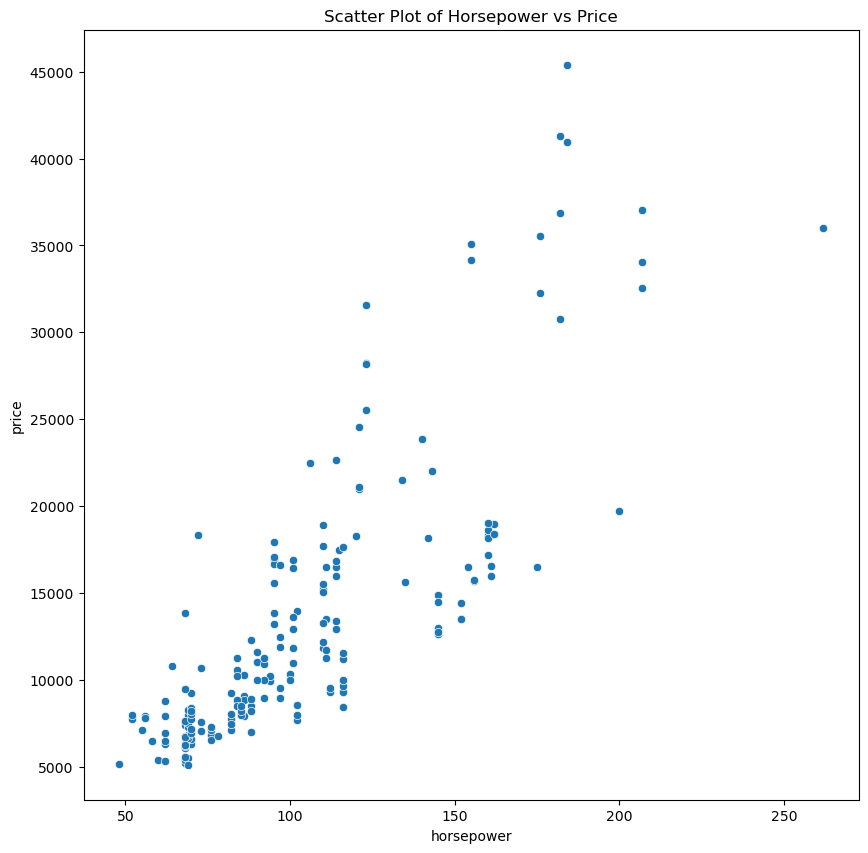

In [33]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=automobile_df['horsepower'], y=automobile_df['price'])
plt.title('Scatter Plot of Horsepower vs Price')
plt.show()

In [34]:
# Handle missing values
# Replacing missing values in 'normalized-losses' with the mean (122.0)
automobile_df.loc[:, 'normalized-losses'] = automobile_df['normalized-losses'].fillna(automobile_df['normalized-losses'].mean())

In [35]:
automobile_df['normalized-losses'].mean()


122.0

In [36]:
# Next drop null values and columns we do not want. Can continue EDA process if we want with more columns.
# For part 3, compare the "price" var to other vars in out dataframe to create our model and analyze it.
automobile_df.isnull().sum()

price                4
highway-mpg          0
city-mpg             0
peak-rpm             2
horsepower           2
compression-ratio    0
stroke               4
bore                 4
fuel-system          0
engine-size          0
num-of-cylinders     0
engine-type          0
curb-weight          0
height               0
width                0
length               0
wheel-base           0
engine-location      0
drive-wheels         0
body-style           0
num-of-doors         2
aspiration           0
fuel-type            0
make                 0
normalized-losses    0
dtype: int64

In [37]:
automobile_df.head()


,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,length,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,122.0
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,122.0
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,171.2,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,122.0
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,176.6,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,176.6,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0


<Axes: xlabel='engine-size', ylabel='Count'>

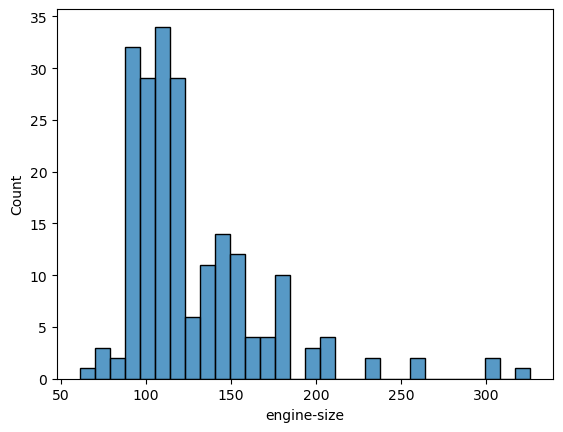

In [38]:
sns.histplot(data=automobile_df, x = "engine-size", bins = 30)


<Axes: xlabel='fuel-system', ylabel='Count'>

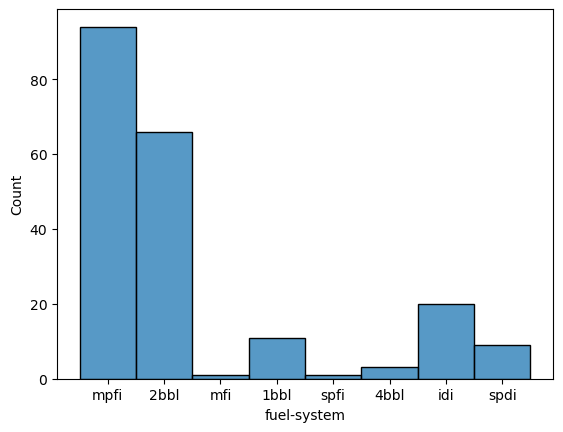

In [42]:
sns.histplot(data=automobile_df, x="fuel-system")

<Axes: xlabel='bore', ylabel='Count'>

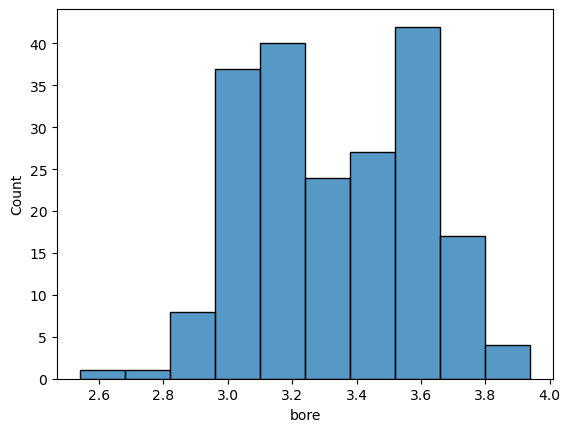

In [43]:
sns.histplot(data=automobile_df, x="bore")

<Axes: xlabel='stroke', ylabel='Count'>

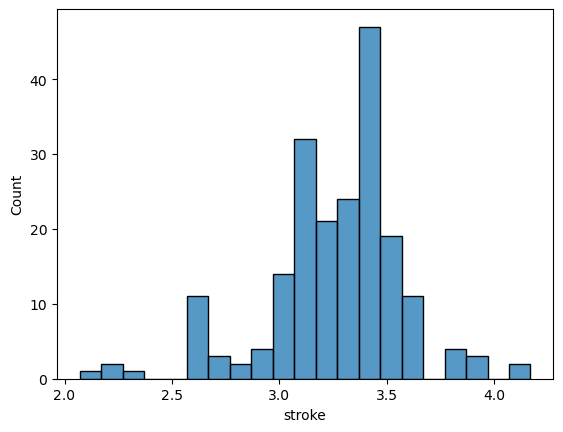

In [44]:
sns.histplot(data=automobile_df, x="stroke")

<Axes: xlabel='compression-ratio', ylabel='Count'>

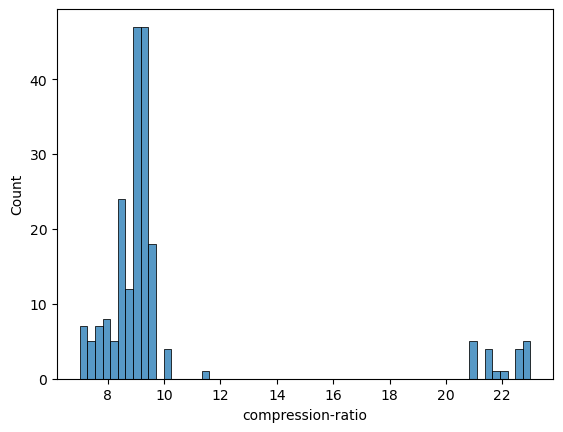

In [39]:
sns.histplot(data=automobile_df, x="compression-ratio")